<a href="https://colab.research.google.com/github/Poimorph/TSP_complexity_IT4A_A25/blob/main/Projet_Complexit%C3%A9_A2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet complexité

Réalisé par :  Suhayb SALEH & Alba Laetitia DJADOU


## 1. Introduction


## 2. La théorie de la complexité

La complexité est une branche des mathématiques, plus particulièrement de l'informatique théorique,
qui analyse de manière formelle le temps de calcul, la mémoire utilisée (et parfois d'autres ressources
comme la taille des circuits, le nombre de processeurs ou l'énergie consommée) nécessaires à un algorithme
pour résoudre un problème. Elle consiste à évaluer la difficulté intrinsèque des problèmes,
à les classer selon leur complexité, et à examiner les relations entre ces différentes classes.


### 2.1 Introduction générale

Dans l’étude des algorithmes, il est fréquent qu’un même problème admette plusieurs solutions possibles.
Pour les départager, il ne suffit pas de vérifier leur exactitude : il faut aussi évaluer leur efficacité.
Celle-ci s’exprime en termes de **temps de réponse** (rapidité) et de **consommation mémoire** (espace).

La **théorie de la complexité** étudie la **difficulté intrinsèque des problèmes informatiques**
et la quantité de ressources (temps et mémoire) nécessaires pour les résoudre.

Elle permet de répondre à des questions essentielles :
- Combien de temps faut-il à un ordinateur pour résoudre un problème ?
- Certains problèmes sont-ils fondamentalement plus difficiles que d’autres ?
- Peut-on classer les problèmes selon leur "niveau de difficulté" ?

---

### 2.2 Complexité temporelle et notation « grand O »



La **complexité temporelle** décrit la façon dont le **temps d’exécution d’un algorithme** croît
avec la taille de son entrée `n`.

On la note souvent avec la **notation Big-O** (`O(...)`),
qui exprime l’ordre de grandeur du nombre d’opérations effectuées.

| Complexité | Type de croissance | Exemple typique |
|-------------|--------------------|----------------|
| O(1) | Constante | Accès à un élément d’un tableau |
| O(log n) | Logarithmique | Recherche dichotomique |
| O(n) | Linéaire | Parcourir une liste |
| O(n²) | Quadratique | Tri par insertion |
| O(2ⁿ) | Exponentielle | Held-Karp (TSP) |
| O(n!) | Factorielle | Force brute (TSP) |



Un algorithme est dit efficace lorsque sa complexité est au plus **polynomiale**.
Au contraire, une croissance **exponentielle** ou **factorielle** devient rapidement impraticable : au-delà de quelques dizaines d’éléments, le temps de calcul dépasse la durée de vie de l’univers.

---

### 2.3 Classes de complexité : P, NP, NP-complet, NP-difficile

Les problèmes sont regroupés en grandes **classes de complexité** :

| Classe | Définition | Exemple |
|---------|-------------|----------|
| **P** | Résolus en temps polynomial | Tri, recherche, graphe connexe |
| **NP** | Vérifiables en temps polynomial | Sudoku, TSP |
| **NP-difficile** | Aussi difficiles que les problèmes NP les plus complexes | TSP, SAT |
| **NP-complet** | À la fois NP et NP-difficiles | TSP (version décisionnelle), Problème du sac à dos |

La question ouverte **P = NP ?** est l’un des plus grands mystères de l’informatique : personne ne sait si tous les problèmes dont la solution peut être vérifiée rapidement peuvent également être résolus rapidement.

Le **théorème de Cook (1971)** démontre que le problème SAT est **NP-complet**, et que tout autre problème NP-complet peut s’y **réduire** en temps polynomial.  
Le **TSP** appartient à cette catégorie lorsqu’il est formulé comme un problème de décision.


---

### 2.4 Le cas du problème du voyageur de commerce (TSP)

Le **TSP** est un **problème NP-difficile** :  
aucun algorithme polynomial n’est connu pour le résoudre exactement.

Cela signifie que :
- Le **temps de calcul explose** de manière exponentielle quand le nombre de villes `n` augmente.
- Les méthodes exactes (Force Brute, Held-Karp) deviennent inutilisables au-delà de 15 à 20 villes.
- D’où la nécessité de recourir à des **heuristiques** et **méta-heuristiques** (Christofides, 2-opt, 3-opt, Recuit simulé)
  qui fournissent **des solutions très proches de l’optimum** en **temps polynomial**.

---

### 2.5 Visualisation de la croissance des complexités

Le graphique suivant illustre la différence entre des croissances polynomiales et exponentielles :


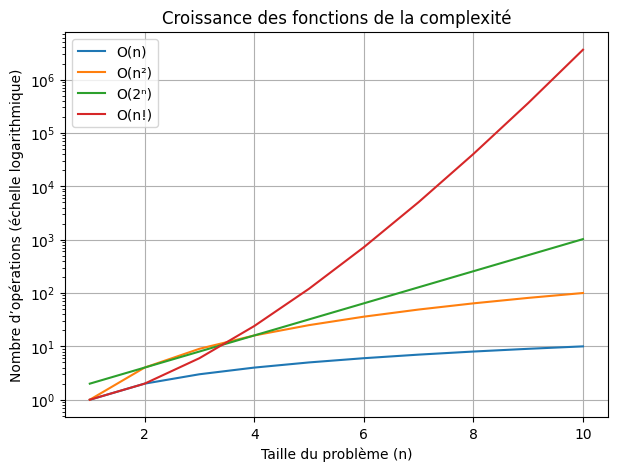

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

n = np.arange(1, 11)
O_n = n
O_n2 = n**2
O_2n = 2**n
O_nf = [math.factorial(x) for x in n]

plt.figure(figsize=(7,5))
plt.plot(n, O_n, label="O(n)", )
plt.plot(n, O_n2, label="O(n²)")
plt.plot(n, O_2n, label="O(2ⁿ)")
plt.plot(n, O_nf, label="O(n!)")
plt.yscale("log")
plt.xlabel("Taille du problème (n)")
plt.ylabel("Nombre d’opérations (échelle logarithmique)")
plt.title("Croissance des fonctions de la complexité")
plt.legend()
plt.grid(True)
plt.show()



### 2.6 Interprétation du graphique

- Les courbes **O(n)** et **O(n²)** (algorithmes polynomiaux) croissent lentement.  
- Les courbes **O(2ⁿ)** et surtout **O(n!)** (algorithmes exponentiels ou factoriaux)
  explosent dès que `n` devient supérieur à 10.  

Cela explique pourquoi les **algorithmes exacts** ne peuvent traiter que de **petites instances du TSP** :
leur complexité croît beaucoup trop vite.

En revanche, les **algorithmes heuristiques** et **méta-heuristiques** (Christofides, 2-opt, 3-opt, Recuit simulé)
restent **efficaces pour de grandes tailles**, car leur complexité est polynomiale.

---


## 3 Génération d'une instance de TSP

La génération des points se fait dans le carré $[0,1]^2$.

#### L'instance TSP générée est **métrique**, c’est-à-dire qu’elle respecte les trois règles suivantes :

Soit $V$ un ensemble de villes et $d$ une fonction de distance
$$V=\{1,2,…,n\}$$
$$d:V\times V\rightarrow \;\mathbb\;{R^+}$$

- **Symétrie** :
$$
\forall \;i,\;j\; \in\, V,\; d(i,j) \;=\; d(j,i)
$$

> La distance entre deux villes est la même dans les deux sens.

- **Positivité (et réflexivité)** :
$$
\forall\; i,\;j\; \in V,\; d(i,j)\;\geq\; 0,\;d(i,i)\; =\; 0
$$

> Les distances sont toujours positives, et la distance d’une ville à elle-même est nulle.

- **Inégalité triangulaire** :
$$
\forall i,\;j,\;k\;\in V,\; d(i,k) \leq d(i,j)\;+\;d(j,k)
$$

> Le chemin direct entre deux villes n’est jamais plus long que de passer par une ville intermédiaire.


In [ ]:
# IMPORTATION DE TOUTES LES BIBLIOTHEQUES

import numpy as np
import itertools
import random
import time
import math
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Tuple, Optional

In [ ]:
def generate_tsp_instance(n, seed=None):
    """
    Génère une instance TSP aléatoire de taille n.
    Args:
        n: nombre de villes
        seed: seed pour la reproductibilité
    Returns:
        Matrice de distance n x n
    """
    if seed is not None:
        np.random.seed(seed)

    # Génération de coordonnées aléatoires
    coords = np.random.rand(n, 2)

    # Calcul de la matrice de distance euclidienne
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])

    return dist_matrix, coords

In [ ]:
# Génère une instance avec 10 villes
distances, coordinates = generate_tsp_instance(5, seed=42)
distances

array([[0.        , 0.5017136 , 0.82421549, 0.32755369, 0.33198071],
       [0.5017136 , 0.        , 0.72642889, 0.72506609, 0.17058938],
       [0.82421549, 0.72642889, 0.        , 0.71690251, 0.7091551 ],
       [0.32755369, 0.72506609, 0.71690251, 0.        , 0.56557921],
       [0.33198071, 0.17058938, 0.7091551 , 0.56557921, 0.        ]])

## 3.5 Fonctions Utilitaires

In [ ]:
def tour_length(D: np.ndarray, tour: List[int]) -> float:
    """
    Calcule la longueur d'un chemin.
    Args:
        D : matrice des distance n x n.
        tour : permutation des villes (indices).
    Returns:
        longueur totale du circuit (fermé).
    """
    idx = np.asarray(tour)
    return float(D[idx, np.roll(idx, -1)].sum())

# Construction du graphe
def draw_graph(adj, title="Graphe complet", path=None, draw_label:bool =True):
    n = len(adj)
    G = nx.Graph()
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i+1, j+1, weight=adj[i][j])

    pos = nx.circular_layout(G)

    nx.draw(G, pos, with_labels=True, node_color='brown', node_size=800, font_size=10)

    if path:
        # Add edges for the path, closing the cycle
        edges = [(path[i]+1, path[i+1]+1) for i in range(len(path)-1)]
        edges.append((path[-1]+1, path[0]+1)) # Add edge to close the cycle
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=3, alpha=0.8)

    if draw_label:
        edge_labels = {edge: f"{w:.2f}" for edge, w in nx.get_edge_attributes(G, 'weight').items()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', label_pos=0.55)

    plt.title(title)
    plt.show()

## 4. Résolution du TSP par Force Brute

### 4.1 Principe de l'algorithme

L'algorithme de force brute teste **toutes les permutations possibles** des villes pour trouver la solution optimale du problème du voyageur de commerce (TSP).

**Fonctionnement :**
- Génère toutes les permutations possibles de visites des villes
- Pour chaque permutation, calcule la distance totale du cycle Hamiltonien
- Conserve la meilleure solution trouvée

**Complexité :** O(n!) - factorial, donc **seulement praticable pour n ≤ 10**

### 4.2 Utilisation du code

```python
# Générer une instance
distances, coords = generate_tsp_instance(5, seed=42)
# Résoudre par force brute
distance_opt, chemin_opt = tsp_brute_force(distances)

print(f"Distance optimale: {distance_opt:.2f}")
print(f"Chemin: {chemin_opt}")
```

**Note :** Pour n=10, il y a 3 628 800 permutations à tester. Pour n=15 : 1,3 trillion.

In [ ]:
def tsp_brute_force(dist_matrix):
    """
    Résout le TSP par force brute.
    Args:
        dist_matrix: matrice de distance n x n
    Returns:
        (meilleure_distance, meilleur_chemin)
    """
    n = len(dist_matrix)
    villes = list(range(n))

    meilleure_distance = float('inf')
    meilleur_chemin = None

    # Teste toutes les permutations possibles
    for perm in itertools.permutations(villes[1:]):
        chemin = [0] + list(perm) + [0]  # Commence et termine à la ville 0
        distance = 0

        # Calcule la distance totale du chemin
        for i in range(len(chemin) - 1):
            distance += dist_matrix[chemin[i]][chemin[i + 1]]

        # Met à jour si meilleure solution trouvée
        if distance < meilleure_distance:
            meilleure_distance = distance
            meilleur_chemin = chemin[:-1]  # Enlève le dernier 0

    return meilleure_distance, meilleur_chemin

Distance optimale: 2.2735
Chemin optimal: [0, 3, 2, 1, 4]


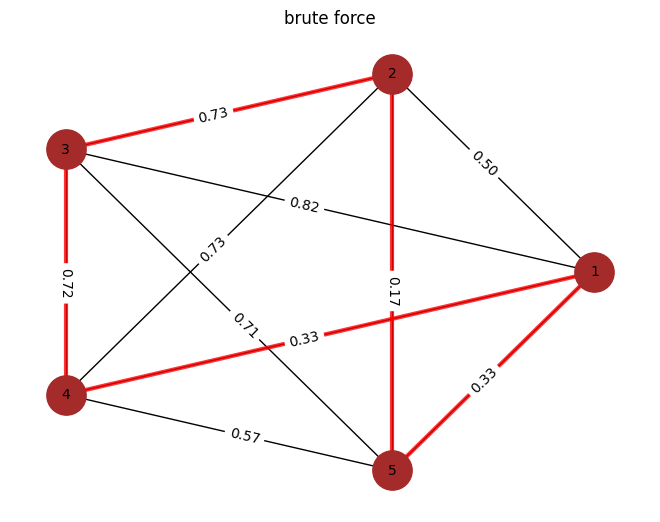

In [ ]:
distances, _ = generate_tsp_instance(5, seed=42)
distance, chemin = tsp_brute_force(distances)
print(f"Distance optimale: {distance:.4f}")
print(f"Chemin optimal: {chemin}")
draw_graph(distances, "brute force",chemin)

### 4.3 Calcul de complexité

1.  **Énumération de tous les cycles hamiltoniens**
```python
for perm in itertools.permutations(nodes):
    tour = (0,) + perm + (0,)
    cost = sum(adj[a][b] for a, b in zip(tour[:-1], tour[1:]))
```
- Nombre de permutations
On fixe le sommet de départ (ici 0) et on parcourt toutes les permutations des n-1 autre sommets
$$
N_{permutations} = (n - 1)! \sim O(n^2)
$$
- Coût de calcul d'un cycle
Le coût d'un cycle nécessite n additions O(n) par cycle
$$
T_{cycle} = O(n)
$$
- Complexité totale en temps
$$
T_2 = O(n!)
$$

2. **Meilleur Cycle**

```python
if cost < best_cost:
    best_cost = cost
    best_tour = tour
```
Chaque comparaison est O(1), faite à chaque itération, donc négligeable devant O(n!)

## 5.  l’algorithme de Held-Karp : Algorithme utilisant la programmation dynamique.

L’algorithme de Held-Karp repose sur le principe de programmation dynamique.Il évite de recalculer plusieurs fois les mêmes sous-problèmes en mémorisant les coûts minimaux pour atteindre une ville donnée à partir d’un sous-ensemble de villes déjà visitées. (Christine Solnon, 2018)

Principes:
- Etape 1: On considère tous les sous-ensembles possibles de villes sauf la ville de depart
- Etape 2: Pour chaque sous ensemble $S$ et chaque ville $j$  $$ j\in S$$
$$
C(S, j) = \min_{i \in S, \, i \neq j} \big[ C(S - \{ j \}, i) + d(i, j) \big]
$$

  où:
    - $ C(S,j) $ est le coût minimal pour atteindre $j$ en visitant exactement les villes de $S$
    - $ d(i,j) $ est la distance de $i$ et $j$

- Etape 3: L'algorithme construit les solutions de plus en plus grandes à partir des plus petites, jusqu'à obtenir le cycle optimal global.


In [ ]:
def held_karp(adj):
    """
    Implémentation de l’algorithme de Held-Karp pour le TSP.
    Complexité : O(n^2 * 2^n)
    Retourne : coût minimal, chemin optimal, temps d’exécution, le nombre d'itérations
    """
    n = len(adj)

    # dp[subset][j] = coût minimal pour atteindre j en visitant subset
    dp = {}
    parent = {}

    # Étape 1 : initialisation (ensembles de 2 sommets : départ et j)
    for j in range(1, n):
        dp[(1 << 0) | (1 << j), j] = adj[0][j]
        parent[(1 << 0) | (1 << j), j] = 0

    # Étape 2 : itération sur toutes les tailles de sous-ensembles
    for subset_size in range(3, n + 1):
        for subset in itertools.combinations(range(1, n), subset_size - 1):
            bits = 1  # toujours inclure le sommet 0
            for bit in subset:
                bits |= 1 << bit

            # Pour chaque dernier sommet j du sous-ensemble
            for j in subset:
                prev_bits = bits & ~(1 << j)
                min_cost = math.inf
                min_prev = None

                # Chercher le meilleur sommet précédent i
                for i in subset:
                    if i == j:
                        continue
                    if (prev_bits, i) in dp:
                        cost = dp[(prev_bits, i)] + adj[i][j]
                        if cost < min_cost:
                            min_cost = cost
                            min_prev = i

                dp[(bits, j)] = min_cost
                parent[(bits, j)] = min_prev

    # Étape 3 : fermer le cycle en revenant au point de départ (0)
    bits = (1 << n) - 1  # tous les sommets visités
    min_cost = math.inf
    min_last = None

    for j in range(1, n):
        cost = dp[(bits, j)] + adj[j][0]
        if cost < min_cost:
            min_cost = cost
            min_last = j

    # Reconstruction du chemin optimal
    path = [0]
    last = min_last
    mask = bits

    for _ in range(n - 1):
        path.append(last)
        prev = parent[(mask, last)]
        mask &= ~(1 << last)
        last = prev
    path.append(0)
    path.reverse()

    return min_cost, path

**Calcul de la complexité**

Etape 1: Génération du graphe complet

  ```python
  for i in range(n):
      for j in range(i + 1, n):
          w = random.randint(weight_range[0], weight_range[1])
          W[i][j] = w
          W[j][i] = w
  ```
- Complexité en temps

Le double for parcourt toutes les paires de sommets (i, j) avec i < j

$$
E = \frac{n(n - 1)}{2} \sim O(n^2)
$$
Chaque affectation et chaque appal à random.randint() est en O(1)
$$
T_1 = O(n^2)
$$

- Complexité en mémoire
On stocke une matrice d'adjacence symétrique de taille n * n
$$
M_1 = O(n^2)
$$

Etape 2: Algorithme de Held-Karp (Programmation dynamique)

- Complexité en temps
Le nombre de sous-ensembles possibles des $n - 1$ villes est de $2^{n-1}$.
Pour chaque sous-ensemble, on parcourt jusqu’à $n$ villes et pour chaque calcul, on fait une boucle interne sur n villes possibles.
$$ T(n) = O(n².2^n) $$

- Complexité en Mémoire
Chaque sous-problème C(S,j) doit être stocké.
Le nombre total de sous-problèmes est de l'ordre de $n \cdot 2^n$

$$ M(n) = O(n.2^n) $$

Etape 3: Fermeture du cycle

A la fin, on effectue une dernière boucle pour revenir au sommet initial

```python
for j in range(1, n):
    cost = dp[(bits, j)] + adj[j][0]
```
- Complexité en temps
$$ T_3 = O(n) $$

- Complexité en mémoire :
Négligeable par rapport au précédent

Etape 4: Reconstruction du chemin optimal

On reconstruit le chemin minimal en suivant le dictionnaire parent

```python
for _ in range(n - 1):
  path.append(last)
  prev = parent[(mask, last)]
  mask &= ~(1 << last)
  last = prev
```

- Complexité en temps:
$$ T_4= O(n) $$
- Complexité en mémoire
 Toujours $$ M(n) = O(n.2^n) $$

> **Remarque**:
> - L'algorithme reste exponentiel, mais il est nettement plus rapide que la force brute O(n!).
> - L'algorithme réduit le coût en temps au prix d'une augmentation de la mémoire.

 Synthèse

 | Étape | Description | Temps | Mémoire |
|:------|:-------------|:------|:--------|
| 1 | Construction du graphe complet | $O(n^2)$ | $O(n^2)$ |
| 2 | Held-Karp (programmation dynamique) | $O(n^2 2^n)$ | $O(n 2^n)$ |
| 3 | Fermeture du cycle | $O(n)$ | Négligeable |
| 4 | Reconstruction du chemin | $O(n)$ | Déjà incluse |


## 6. Résolution avec l'algorithme de Christofides-Serdyukov

### 6.1 Principe de l'algorithme

L'algorithme de Christofides-Serdyukov est un algorithme d'approximation pour un TSP métrique. L'aglorithme décompose le problème en deux sous-problèmes :
- Le problème de l'arbre couvrant de poids minimal (ACM)
- Le problème du couplage de poids minimum des sommets de degré impair

Après la résoulution des sous-problèmes, il construit un cycle eulérien raccourci en cycle hamiltonien puis retourne un circuit hamiltonien.

Étapes de l'agorithme:
1. Calculer un ACM $T$ du graphe des villes.
2. Définir $I$ comme l'ensemble des sommets de degré impair dans $T$.
3. calculer le couplage parfait $M$ de poids minimal dans le sous-graphe induis par $I$.
4. Créer le multigraphe $H$ à partir des arêtes de $M$ et $T$ : Tous les sommet ont des dégrès pair à présent.
5. Trouver un cycle eulérien dans $H$.
6. Transformer le cycle eulérien en cycle hamiltonien en sautant les répétitions (valide grâce à l'inégalité triangulaire) et finalement le transformer en chemin hamiltonien en coupant le dernier sommet.

> (Wikimedia, 2023)

Garentie: facteur d'approximation $\leq 3/2$ du coût optimal (établie par Serdykov)

complexité theorique : $O(n^3)$ donc practicable pour $n\leq1000$

---

### 6.2 Utilisation du code

```python
# Générer une instance métrique (euclidienne) du TSP
distances, coords = generate_tsp_instance(80, seed=42)

# Résoudre avec Christofides–Serdyukov
distance_approx, chemin_approx = tsp_christofides(distances)

print(f"Distance (≈ 1.5-approx) : {distance_approx:.2f}")
print(f"Chemin: {chemin_approx}")

```
> Remarque :
> - L'algorithme suppose une instance TSP métrique


In [ ]:
def tsp_christofides(distances):
    """
    Résout le TSP par approximation avec l'algorithme de Chrisofides.
    Args:
        distances: matrice de distance n x n
    Returns:
        (ditance_approx, chemin_approx): un Tuple de l'approximation trouvée
    """
    n = len(distances)
    G = nx.Graph()
    # on construit le graphe complet
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=float(distances[i][j]))
    # on calcule le Arbre couvrant de poids minimal de G
    mst = nx.minimum_spanning_tree(G)
    # on regroupe les sommets de degré impair
    odd_nodes = [v for v in mst.nodes if mst.degree(v) % 2 == 1]
    # détermine le couplage parfait des sommets de degrés impairs
    subgraph = G.subgraph(odd_nodes)
    matching = nx.algorithms.matching.min_weight_matching(subgraph)

    # construction du multigraphe eulérien
    M = nx.MultiGraph(mst)
    for u, v in matching:
        M.add_edge(u, v, weight=G[u][v]["weight"])
    # construction du cycle eulérien
    tour = list(nx.eulerian_circuit(M, source=0))
    # transformation en cycle hamiltonien
    order = [tour[0][0]] + [v for _, v in tour]
    order = list(dict.fromkeys(order))  # shortcuts
    order.append(order[0])
    # calcul du côut (distance) du chemin
    total = sum(distances[order[i], order[i+1]] for i in range(len(order)-1))
    # retour de la distance et du chemin hamiltonien
    return float(total), order[:-1]

Distance ≈ 2.2735
Chemin : [0, 4, 1, 2, 3]


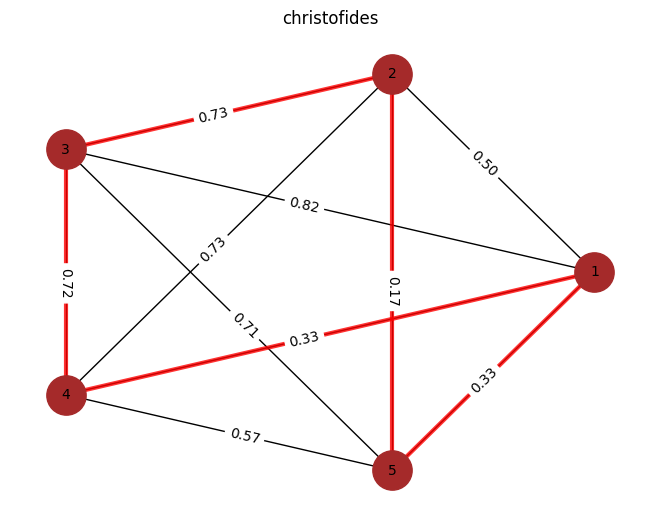

In [ ]:
distances, _ = generate_tsp_instance(5, seed=42)
distance_approx, chemin_approx = tsp_christofides(distances)
print(f"Distance ≈ {distance_approx:.4f}")
print(f"Chemin : {chemin_approx}")
draw_graph(distances, "christofides",chemin_approx)

### 6.4 Calcule de complexité

#### Étape 1 : Construction du graphe complet
```python
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, weight=float(distances[i][j]))
```
- Complexité en Temps

    Nombre d'arêtes :
    $$ E = \frac{n(n - 1)}{2} = \frac{1}{2}(n^2-n)\sim O(n^2)$$
    la méthode `G.add_edge` a une complexité en O(1)

* **Complexité Totale** : $T_1 = O(n^2)$
- Complexité en Mémoire :

    Chaque arête est stockée avec deux références aux villes et un attribut weight
* **Espace Mémoire** : $M_1 = O(n^2)$

---

#### Étape 2 : Arbre couvrant de poids minimal

```python
mst = nx.minimum_spanning_tree(G)
```
- Complexité en Temps

  Nombre d'arêtes $m = O(n^2)$\
  Kruskal :
  - tri des arêtes : $O(m\log m) = O(n^2\log n^2) = O(n^2\log n)$
  - Union-find: $O(m\alpha(n))$ négligable devant le tri
* **Complexité Totale** : $T_2 = O(n^2\log n)$
- Complexité en Mémoire :

    Structure Union-Find + copie  partielle du graphe : $O(n+m) = O(n^2)$
    **Espace Mémoire** : $M_2 = O(n^2)$
  
---

#### Étape 3 : Extraction des sommets impairs

```python
odd_nodes = [v for v in mst.nodes if mst.degree(v) % 2 == 1]
```
- Complexité en Temps
* Chaque calcul de `mst.degree(v)` est ( O(deg(v)) ), mais la somme des degrés vaut ( 2(n-1) ) (car un arbre a ( n-1 ) arêtes).
* **Complexité Totale** :$T_3 = O(n)$
  (très faible comparé au reste).

---

#### Étape 4 : Appariement parfait minimal sur les sommets impairs

```python
matching = nx.algorithms.matching.min_weight_matching(subgraph)
```
Détails :

* Soit ( $k = |odd\_nodes|$) (toujours pair, ≤ n)
* Graphe complet sur ces ( $k$ ) sommets $\Rightarrow$ ( $O(k^2)$ ) arêtes.
* L’algorithme utilisé par NetworkX est une implémentation du Blossom (Edmonds).

  * Version complexe : Blossom V (ou “blossom algorithm” classique)
  * Temps théorique : ( $O(k^3)$ )
  * Espace : ( $O(k^2)$ )

Dans le pire cas :

( $k \approx n$ ), donc : $T_4 = O(n^3),\;\; \quad M_4 = O(n^2)$

Remarque :

C’est le goulot d’étranglement principal de l’algorithme de Christofides.

---

#### Étape 5 : Construction du multigraphe eulérien

```python
M = nx.MultiGraph(mst)
for u, v in matching:
    M.add_edge(u, v, weight=G[u][v]["weight"])
```
Complexité en Temps :
    
* Ajout d’environ $\frac{k}{2} \le \frac{n}{2}$ arêtes $\rightarrow$ $M_5 = O(n)$
* Opérations `add_edge` $\rightarrow$ $O(1)$ chacune
* **Complexité Totale** $\rightarrow$ $T_5 = O(n)$

#### Étape 6 : Circuit eulérien

```python
tour = list(nx.eulerian_circuit(M))
```

Détails :

* Un circuit eulérien passe une fois par chaque arête.
* Le graphe contient ( $O(n)$ ) arêtes ($\approx ( n - 1 + \frac{k}{2} )$).

Complexité :

* Chaque arête est visitée une fois $\Rightarrow ( O(|E_M|) = O(n) )$

---

#### Étape 7 : Conversion en tournée hamiltonienne (“shortcuts”)

```python
order = [tour[0][0]] + [v for _, v in tour]
order = list(dict.fromkeys(order))
```

Détails :

* Parcours linéaire  $\rightarrow ( O(n) )$.

---

#### Étape 8 : Calcul du coût total

```python
total = sum(distances[order[i], order[i+1]] for i in range(len(order)-1))
```

Détails :

* $(n)$ additions et accès en $(O(1)) \rightarrow (O(n))$.

#### Synthèse

| Étape | Complexité temps | Complexité mémoire |
| :---: | :--------------- | :----------------- |
| 1     | O(n²)            | O(n²)              |
| 2     | O(n² log n)      | O(n²)              |
| 3     | O(n)             | O(n)               |
| 4     | O(n³)            | O(n²)              |
| 5     | O(n)             | O(n)               |
| 6     | O(n)             | O(n)               |
| 7     | O(n)             | O(n)               |

- Complexité temps
$$
T(n) = O(n^3)
$$
- complexité mémoire
$$
M(n)=O(n^2)
$$

___
___

### 7. Résolution du TSP avec algorithmes de recherche locale

#### 7.1 Principe des algorithmes

Les algorithmes de recherche locale cherchent à améliorer une solution initiale en explorant son voisinage (i.e. l’ensemble des solutions pouvant être obtenues par de petites modifications de la solution courante).
L’objectif est de réduire progressivement la distance totale du cycle jusqu’à atteindre un optimum local (i.e. une solution qui ne peut plus être améliorée par le voisinage choisi).

Le schéma général est le suivant :

1. Partir d’une solution initiale $S$.
2. Générer les solutions voisines de $S$ selon un opérateur donné.
3. Si une solution voisine $S'$ est meilleure, remplacer $S \leftarrow S'$ et recommencer.
4. Arrêter lorsque plus aucune amélioration n’est possible ou après un nombre maximal d’itérations.

---

### 7.2 Opérateurs de voisinage k-opt

Les opérateurs **k-opt** consistent à supprimer $k$ arêtes dans le cycle et à reconnecter les segments autrement pour obtenir un nouveau cycle.
Ces mouvements permettent d’explorer efficacement l’espace des solutions.

* **2-opt** :
  On retire deux arêtes $(i,j)$ et $(k,l)$ puis on reconnecte les sommets en inversant la sous-chaîne intermédiaire, créant ainsi un nouveau cycle.
  Cet opérateur est simple et très efficace pour éliminer les croisements dans le cycle, améliorant souvent rapidement la solution.

* **3-opt** :
  Extension du 2-opt où trois arêtes sont supprimées et reconnectées de façon optimale parmi plusieurs configurations possibles.
  Il explore un voisinage plus large et peut trouver de meilleures améliorations, au prix d’un coût de calcul plus élevé.

> Remarque : les opérateurs k-opt garantissent le maintien d’un cycle hamiltonien valide.

---

### 7.3 Recuit simulé

Le recuit simulé (*Simulated Annealing*) est une méta-heuristique stochastique inspirée du processus de refroidissement des métaux en physique.
Contrairement à la recherche locale classique, il accepte parfois des solutions moins bonnes afin d’éviter de rester bloqué dans un optimum local.

Principe :

1. Initialiser une solution $S$ et une température $T$ élevée.
2. Générer une solution voisine $S'$ (souvent via 2-opt).
3. Si $S'$ est meilleure, on l’accepte.
   Sinon, on l’accepte avec une probabilité $p = \exp(-\frac{\Delta}{T})$, où $\Delta$ est la perte de qualité.
4. Diminuer progressivement la température $T$ selon un plan de refroidissement.
5. Répéter jusqu’à ce que $T$ devienne très faible.

Le recuit simulé équilibre exploration globale et exploitation locale, et donne souvent de très bons résultats pratiques pour le TSP.

---

### 7.4 Exemple d’utilisation du code

```python
# Solution initiale : résultat de Christofides
distances, coords = generate_tsp_instance(80, seed=42)
_, chemin_init = tsp_christofides(distances)

# Amélioration par recherche locale
chemin_2opt, dist_2opt = local_search_2opt(chemin_init, distances)
chemin_sa, dist_sa = simulated_annealing(chemin_init, distances)

print(f"Distance 2-opt : {dist_2opt:.2f}")
print(f"Distance recuit simulé : {dist_sa:.2f}")
```

> Remarques :
>
> * Les opérateurs de voisinage (2-opt, 3-opt) sont souvent utilisés comme sous-routines dans des méta-heuristiques comme le recuit simulé ou les algorithmes génétiques.
> * Ces méthodes offrent un bon compromis entre qualité de solution et temps de calcul.


In [ ]:
def two_opt_swap(tour: List[int], i: int, k: int) -> List[int]:
    """
    Applique un mouvement 2-opt : inverse le sous-chemin entre les indices i et k.
    Exemple: tour = [0,1,2,3,4,5], i=1, k=4 → [0,4,3,2,1,5]

    Args:
        tour : chemin actuel.
        i : indice de début du segment à inverser.
        k : indice de fin du segment à inverser.

    Returns:
        Nouveau cheminaprès inversion du segment.
    """
    return tour[:i] + list(reversed(tour[i:k+1])) + tour[k+1:]

In [ ]:
def local_search_2opt(tour: List[int], D: np.ndarray, max_passes: int = 100) -> Tuple[List[int], float]:
    """
    Recherche locale utilisant l'heuristique 2-opt pour le problème du voyageur de commerce (TSP).

    À partir d'un chemin initial, la fonction cherche à réduire la longueur totale
    en inversant des segments de la tournée (mouvements 2-opt), jusqu’à atteindre
    un optimum local ou un nombre maximal de passes.

    Args:
        tour : chemin initial.
        D : matrice des distances entre les villes.
        max_passes : nombre maximum d’itérations globales autorisées.

    Returns:
        (longueur correspondante, meilleur chemin trouvé)
    """
    n = len(tour)
    best = tour[:]
    best_len = tour_length(D, best)

    for _ in range(max_passes):
        improved = False
        # Parcourt toutes les paires d’arêtes (a,b) et (c,d)
        for i in range(n - 1):
            a, b = best[i], best[(i+1) % n]
            for k in range(i + 2, n - (i == 0)):  # évite de couper l'arête (dernier,0)
                c, d = best[k], best[(k+1) % n]
                # gain potentiel si on remplace (a,b) et (c,d) par (a,c) et (b,d)
                delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])
                # si la nouvelle configuration améliore le chemin
                if delta < -1e-12:
                    best = two_opt_swap(best, i + 1, k)   # inversion du segment
                    best_len += delta     # Mise à jour de la longueur du chemin
                    improved = True
                    break
            if improved:
                break      # ne pas faire une nouvelle boucle avec un chemin améliorée
        if not improved:   # Pas d'amélioration ==> Optimum locla atteint
            break
    return best_len, best

In [ ]:
def _apply_reconnect(tour: List[int], i: int, j: int, k: int, code: int) -> List[int]:
    """
    Reconstruit le tour pour l'un des 7 schémas (A|B|C|D), avec A=tour[:i+1], B=tour[i+1:j+1], C=tour[j+1:k+1], D=tour[k+1:].
    On ne l'appelle qu'une fois par passe (pour le meilleur code).
    """
    A = tour[:i+1]
    B = tour[i+1:j+1]
    C = tour[j+1:k+1]
    D = tour[k+1:]

    if code == 0:   # A + B^R + C + D  (2-opt sur (i,i+1)-(j,j+1))
        return A + B[::-1] + C + D
    if code == 1:   # A + B + C^R + D  (2-opt sur (j,j+1)-(k,k+1))
        return A + B + C[::-1] + D
    if code == 2:   # A + B^R + C^R + D
        return A + B[::-1] + C[::-1] + D
    if code == 3:   # A + C + B + D    (swap B,C)
        return A + C + B + D
    if code == 4:   # A + C^R + B + D
        return A + C[::-1] + B + D
    if code == 5:   # A + C + B^R + D
        return A + C + B[::-1] + D
    if code == 6:   # A + C^R + B^R + D
        return A + C[::-1] + B[::-1] + D
    return tour

def _delta_for_code(D: np.ndarray, tour: List[int], i: int, j: int, k: int, code: int) -> float:
    """
    Calcule Δ = coût_nouveau - coût_ancien en O(1) pour un code donné.
    Notation :
      arêtes coupées : (a,a1), (b,b1), (c,c1) avec
        a = tour[i],     a1 = tour[(i+1)%n]
        b = tour[j],     b1 = tour[(j+1)%n]
        c = tour[k],     c1 = tour[(k+1)%n]
    Les arêtes ajoutées dépendent du schéma de reconnexion.
    """
    n = len(tour)
    a  = tour[i]
    a1 = tour[(i+1) % n]
    b  = tour[j]
    b1 = tour[(j+1) % n]
    c  = tour[k]
    c1 = tour[(k+1) % n]

    removed = D[a, a1] + D[b, b1] + D[c, c1]

    # Table des arêtes ajoutées (3 nouvelles arêtes) pour chaque code
    if code == 0:
        # A + B^R + C + D  -> add (a,b), (a1,b1), (c,c1)
        added = D[a, b] + D[a1, b1] + D[c, c1]
    elif code == 1:
        # A + B + C^R + D  -> add (a,a1), (b,c), (b1,c1)
        added = D[a, a1] + D[b, c] + D[b1, c1]
    elif code == 2:
        # A + B^R + C^R + D -> add (a,b), (a1,c), (b1,c1)
        added = D[a, b] + D[a1, c] + D[b1, c1]
    elif code == 3:
        # A + C + B + D    -> add (a,b1), (c,a1), (b,c1)
        added = D[a, b1] + D[c, a1] + D[b, c1]
    elif code == 4:
        # A + C^R + B + D  -> add (a,c), (b1,a1), (b,c1)
        added = D[a, c] + D[b1, a1] + D[b, c1]
    elif code == 5:
        # A + C + B^R + D  -> add (a,b1), (c,b), (a1,c1)
        added = D[a, b1] + D[c, b] + D[a1, c1]
    elif code == 6:
        # A + C^R + B^R + D -> add (a,c), (b1,b), (a1,c1)
        added = D[a, c] + D[b1, b] + D[a1, c1]
    else:
        return 0.0

    return float(added - removed)

In [ ]:
def local_search_3opt(tour: List[int], D: np.ndarray, max_passes: int = 20) -> Tuple[List[int], float]:
    """
    Recherche locale utilisant l'heuristique 3-opt pour le problème du voyageur de commerce (TSP).
    """
    n = len(tour)
    best = tour[:]
    best_len = tour_length(D, best)

    for _ in range(max_passes):
        improved = False
        best_delta = 0.0
        best_tuple = None  # (i, j, k, code)

        for i in range(n):
            a1_idx = (i + 1) % n
            for j in range(i + 2, n):        # j >= i+2
                b1_idx = (j + 1) % n
                if j == a1_idx:               # garde-fou (inutile ici mais explicite)
                    continue
                for k in range(j + 2, n):     # k >= j+2
                    if k == b1_idx:
                        continue

                    # Évaluer les 7 codes avec Δ en O(1)
                    # (option : petit pruning possible si on veut)
                    local_best_code = None
                    local_best_delta = 0.0

                    # On peut dérouler la boucle pour micro-gagner, mais gardons-la claire
                    for code in range(7):
                        delta = _delta_for_code(D, best, i, j, k, code)
                        if delta < local_best_delta - 1e-12:  # amélioration
                            local_best_delta = delta
                            local_best_code = code

                    if local_best_code is not None:
                        # Best-improvement : mémoriser si meilleur jusqu'ici
                        if local_best_delta < best_delta - 1e-12:
                            best_delta = local_best_delta
                            best_tuple = (i, j, k, local_best_code)


        if best_tuple is not None:
            i, j, k, code = best_tuple
            best = _apply_reconnect(best, i, j, k, code)
            best_len += best_delta
            improved = True

        if not improved:
            break

    return best_len, best

In [ ]:
def simulated_annealing( tour: List[int], D: np.ndarray, T0: Optional[float] = None, Tmin: float = 1e-4, cooling: float = 0.995, iters_per_T: int = 200, max_steps: Optional[int] = None, rng: Optional[random.Random] = None) -> Tuple[List[int], float]:
    rng = rng or random.Random()
    n = len(tour)
    current = tour[:]
    cur_len = tour_length(D, current)
    best, best_len = current[:], cur_len

    # T0 heuristique si non fourni
    T = (0.1 * D.mean() * n) if T0 is None else float(T0)
    steps = 0

    while T > Tmin:
        for _ in range(iters_per_T):
            if max_steps is not None and steps >= max_steps:
                return best, best_len
            steps += 1

            i = rng.randrange(0, n - 1)
            k = rng.randrange(i + 1, n)
            a, b = current[i], current[(i+1) % n]
            c, d = current[k], current[(k+1) % n]
            delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])

            if delta < 0 or rng.random() < math.exp(-delta / max(T, 1e-12)):
                current = two_opt_swap(current, i + 1, k)
                cur_len += delta
                if cur_len < best_len - 1e-12:
                    best, best_len = current[:], cur_len
        T *= cooling
    return  best_len, best

[Init]  Christofides : 4.80
[2-opt] Longueur     : 4.16  (gain 0.64)
[3-opt] Longueur     : 4.16  (gain 0.64)
[SA]    Longueur     : 4.07  (gain 0.73)


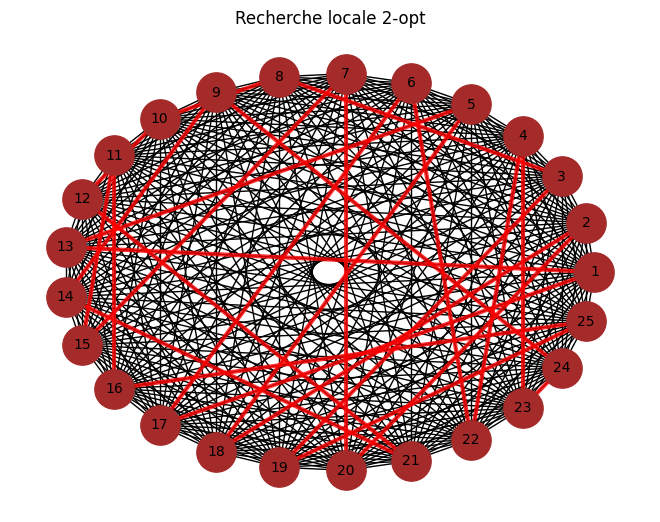

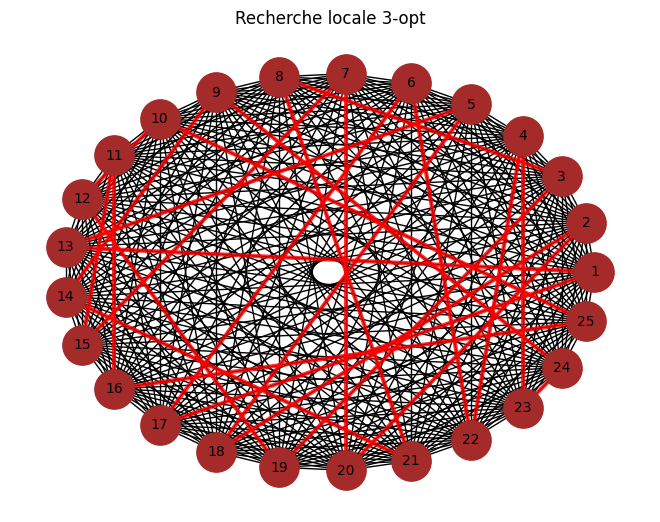

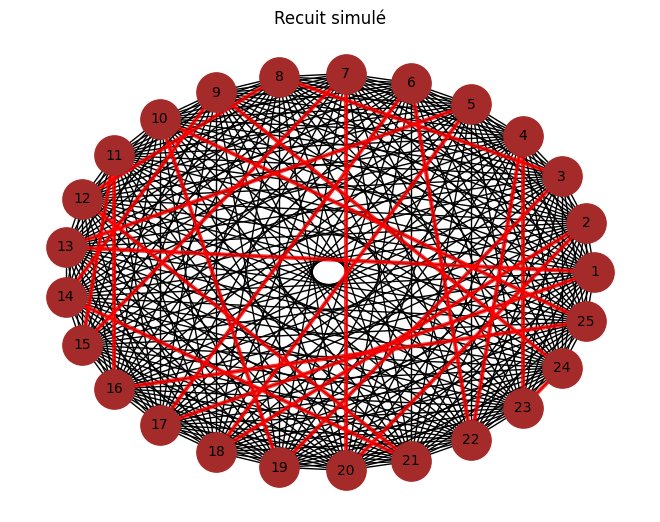

In [ ]:
distances, _ = generate_tsp_instance(25, seed=42)
dist_init, tour_init  = tsp_christofides(distances)
print(f"[Init]  Christofides : {dist_init:.2f}")

dist_2, tour_2 = local_search_2opt(tour_init, distances)
print(f"[2-opt] Longueur     : {dist_2:.2f}  (gain {dist_init - dist_2:.2f})")

dist_3, tour_3 = local_search_3opt(tour_init, distances)
print(f"[3-opt] Longueur     : {dist_3:.2f}  (gain {dist_init - dist_3:.2f})")

dist_sa, tour_sa = simulated_annealing(tour_2, distances)
print(f"[SA]    Longueur     : {dist_sa:.2f}  (gain {dist_init - dist_sa:.2f})")


draw_graph(distances, "Recherche locale 2-opt",tour_2, False)
draw_graph(distances, "Recherche locale 3-opt",tour_3, False)
draw_graph(distances, "Recuit simulé",tour_sa, False)

### 7.5 Calcule de complexité

#### 7.5.1 Complexité de la recherche locale 2-opt (first improvement)

- **1. complexité de `tour_lenght(D, tour)`**

  ```python
  def tour_length(D: np.ndarray, tour: List[int]) -> float:
    idx = np.asarray(tour)
    return float(D[idx, np.roll(idx, -1)].sum())
  ```

  - Complexité temps:

    - Conversion de `tour` en tableau numpy $\rightarrow O(n)$
    - Décalage circulaire avec `np.roll` $\rightarrow O(n)$
    - Accès à `D[idx, np.roll(idx, -1)]` et somme $\rightarrow O(n)$

  $\Rightarrow$ Temps Total : $T_1 = O(n)$ $\Rightarrow$ fonction linéaire sur le nombre de villes

  - Complexité mémoire :

    - Création de deux tableaux temporaires (`idx` et le résultat de `np.roll`) $\rightarrow O(n)$

    $\Rightarrow$ Mémoire totale : $M_1 = O(n)$

___

- **2. complexité de `two_opt_swap(tour, i, k)`**

  ```python
  def two_opt_swap(tour: List[int], i: int, k: int) -> List[int]:
      return tour[:i] + list(reversed(tour[i:k+1])) + tour[k+1:]
  ```

  - Complexité temps:

    - `tour[:i]` $\rightarrow$ copie des i premiers éléments $\rightarrow$ (O(i))
    - `reversed(tour[i:k+1])` $\rightarrow$ inverse une sous-liste de longueur (k - i + 1) $\rightarrow$ (O(k - i + 1))
    - `tour[k+1:]` $\rightarrow$ copie du reste $\rightarrow$ (O(n - k - 1))

  $\Rightarrow$ Temps Total :

  $$
  T_2 = O(i) + O(k-i+1) + O(n - k - 1) = O(n)
  $$

  - Complexité mémoire :

    - On crée une nouvelle liste de taille n $\rightarrow$ (O(n))

  $\Rightarrow$ Mémoire totale : $M_2 = O(n)$

___

- **3. Complexité de `local_search_2opt(tour, D, max_passes)`**

  1.  **Initialisation**
      - Copie de tour : $O(n)$
      - calcul de `best_len`avec `tour_lenght` : O(n)

        $\Rightarrow$ Complexité en $O(n)$ en temps et en mémoire

  2.  **Structure d'une passe**

      ```python
      for i in range(n - 1):
          a, b = best[i], best[(i+1) % n]
          for k in range(i + 2, n - (i == 0)):
              c, d = best[k], best[(k+1) % n]
              delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d])
              if delta < -1e-12:
                  best = two_opt_swap(best, i + 1, k)  # O(n)
                  ...
                  break
          if improved:
              break
      ```
      
      2.1. **Nombre exact de paires (i,k) testées par passe (sans amélioration)**

      - Pour (i=0), $(k \in {2,...,n-2}) \Rightarrow (n-3)$ valeurs.
      - Pour $(i=1,...,n-2), (k \in {i+2,...,n-1}) \Rightarrow (n-i-2)$ valeurs.
      - somme totale :
        $$
           (n-3) + \sum_{i=1}^{n-2} (n - i - 2)
            = (n-3) + \sum_{j=0}^{n-3} j
            = (n-3) + \frac{(n-3)(n-2)}{2}
            = \frac{n(n-3)}{2}
          $$

          $\Rightarrow$ donc complexité temps en $O(n^2)$

      2.2. **Complexité d’un test (calcul de $\Delta$)**

      - 4 accès à `D` + opérations arithmétiques constantes $\rightarrow O(1)$.

      2.3. **Complexité d'un swap**

      - `two_opt_swap(best, i+1, k)` déjà calculé $\rightarrow (O(n))$.
      - Mise à jour de `best_len` par addition de `delta` $\rightarrow O(1)$.
        Point clé : stratégie first-improvement $\rightarrow$ au plus un swap par passe, et on quitte les boucles dès la 1ère amélioration.

___

  3.  **Coût d'une passe**

      3.1. **Aucune amélioration trouvée (pire cas)**

      - On évalue tous les $\frac{n(n-3)}{2}$ candidats
      - Temps par passe :$O(n^2)$.
      - Espace additionelle: $O(1)$

      3.2. **Cas avec amélioration (first-imporvemnt)**

      - On vérifie $q$ candidats jusqu’au premier améliorant, donc $O(q)$ tests.
      - Puis un swap $\rightarrow O(n)$.

      Temps par passe : $O(q) + O(n)$.

      - Si l’amélioration arrive tôt (petit $q$) $\rightarrow$ la passe est en $(O(n))$.
      - Si l’amélioration arrive tard (grand $q$) $\rightarrow$ la passe est en $O(n^2)$.

___

  4.  **Nombre de passes et cout total**

      Soit $P$, le nombre de passes effectuées avant d'atteindre l'optimum local.

      $$
         0 \leq P \leq \text{max\_passes}
      $$

      4.1. **Pire cas théorique**
      
      Chaque passe peut coûter $\Theta(n^2)$ (si pas d’amélioration) ou $\Theta(n^2) + O(n)$ (Amélioration tardive + un swap).
      
      Donc temps total :
      $$
      T_4 = O(P \cdot n^2) + O(n)
      $$
      ($+O(n)$ pour l'initailisation)

      - Avec `max_passes` ($P\leq \text{max\_passes}$) :
      $$
      T_{42} = O(\text{max\_passes} \cdot n^2)
      $$

      Mémoire totale :

      - `best`est une liste de taille $n$ $\rightarrow O(n)$
      - variable temporaires $\rightarrow O(1)$
      $$
      M_4 = O(n)
      $$

___

  5.  **Synthèse**

| Étape | Complexité en Temps               | Complexité en Mémoire |
| :---: | :-------------------------------- | :-------------------- |
| 1     | $O(n)$                            | $O(n)$                |
| 2.1   | $O(n^2)$                          | $O(1)$                |
| 2.2   | $O(1)$                            | $O(1)$                |
| 2.3   | $O(n)$                            | $O(n)$                |
| 3.1   | $O(n^2)$                          | $O(1)$                |
| 3.2   | $O(q + n)$, avec $(q \le n^2)$    | $O(n)$                |
| 4     | $O(\text{max_passes} \cdot n^2)$ | $O(n)$                |

- Complexité temps
$$
T(n) = O(\text{max_passes} \cdot n^2)
$$
- complexité mémoire
$$
M(n)=O(n)
$$
___
___

#### 7.5.2 Complexité de la recherche locale 3-opt

1. **complexité de `_delta_for_code(D, tour, i, j, k, code)`**

    ```python
    def _delta_for_code(D, tour, i, j, k, code):
        ...
        return float(added - removed)
    ```
    
    - Complexité temps :

      - Accès à 6 éléments du tableau `tour` $\rightarrow O(1)$
      - Accès à 6 cases de la matrice `D` $\rightarrow O(1)$
      - 6 additions et 1 soustraction $\rightarrow O(1)$

      Temps total : $T_1 = O(1) \Rightarrow$ le calcul de delta est constant
      
    - Complexité mémoire :

      $$
      \rightarrow M_1 = O(1)
      $$

___

2. **complexité de `_apply_reconnect(tour, i, j, k, code)`**

    ```python
       def _apply_reconnect(tour, i, j, k, code):
        A = tour[:i+1]
        B = tour[i+1:j+1]
        C = tour[j+1:k+1]
        D = tour[k+1:]
        ...
        return A + B[::-1] + C + D
    ```
    
    - Complexité temps :

      - Découpage en quatre segments $\rightarrow 4\times O(n) = O(n)$
      - inversion de segments  $\rightarrow O(n)$
      - Concaténation finale  $\rightarrow O(n)$

      Temps total : $T_2 = O(1) \Rightarrow$ le calcul de delta est constant
      
    - Complexité mémoire :

      - Création d’une nouvelle liste de taille $n$ $\rightarrow O(n)$
      - Variables temporaires (A, B, C, D) de taille cumulée $n$  $\rightarrow O(n)$

      Mémoire total :

      $$
      M_2 = O(n)
      $$

___

3. **complexité de `local_search_3opt(tour, D, max_passes)`**

  3.1 **Initialisation**

     ```python
    best = tour[:]
    best_len = tour_length(D, best)
    ```
  - Copie de `tour` $\rightarrow O(n)$
  - Calcul de `tour_length` $\rightarrow O(n)$

  $$
  \Rightarrow T_{31} = O(n), \quad M_{31} = O(n)
  $$

  3.2 **Structure d’une passe**

    ```python
    for i in range(n):
        for j in range(i + 2, n):
            for k in range(j + 2, n):
                for code in range(7):
                    delta = _delta_for_code(...)
                    ...
    ```

   3.2.1 **Nombre de triples (i, j, k)**

  - contraintes : $i < j < k$, avec ($j \ge i+2$) et ($k \ge j+2$)
  - Nombre exact de combinaisons possibles :

  $$
  \text{Nb_triples} = \binom{n-2}{3}
  = \frac{(n-2)(n-3)(n-4)}{6}
  = O(n^3)
  $$

   3.2.2 **Complexité d’un test**

   - 7 appels à `_delta_for_code` $\rightarrow 7 \times O(1) = O(1)$
   - Comparaisons et affectations $\rightarrow O(1)$

   $$
   T_{32} = O(1)
   $$

   3.2.3 **Coût d’une passe**

   - Complexité en temps :
   
       - Tous les triples testés $\rightarrow O(n^3)$
       - Application du meilleur movement $\rightarrow O(n)$

      $$
          T_{325} = O(n^3)
      $$
    
  - Complexité en mémoire:

      - `best` $\rightarrow O(n)$
      - Variables temporaires $\rightarrow O(1)$
      - Tour lors de l'application $\rightarrow O(n)$

     $$
     M_{325} = O(n)
     $$

   3.3 **Nombre de passes**

   Soit $P$, le nombre de passes effectuées avant d'atteindre l'optimum local.

      $$
         0 \leq P \leq \text{max_passes}
      $$

   3.4 **Coût total**
   - Complexité en temps :
  
     $$
        T(n) = O(P \cdot n^3) + O(n)
     $$
     $$
     \Rightarrow T(n) = O(\text{max_passes} \cdot n^3)
     $$
   - Complexité en mémoire :

     $$
     M(n) = O(n)
     $$
   
___
      


  4.  **Synthèse**

| Étape                            |         Complexité Temps         | Complexité Mémoire |
| :------------------------------- | :------------------------------- | :----------------  |
| `_delta_for_code`                | $O(1)$                           |$O(1)$              |
| `_apply_reconnect`               | $O(n)$                           |$O(n)$              |
| Une passe de `local_search_3opt` | $O(n^3)$                         |$O(n)$              |
| Algorithme complet               | $O(\text{max_passes} \cdot n^3)$|$O(n)$              |

- Complexité temps
$$
T(n) = O(\text{max_passes} \cdot n^3)
$$
- complexité mémoire
$$
M(n)=O(n)
$$
___
___

#### 7.5.3 Complexité de la recherche locale par circuit simulé

1. **Initialisation**
    
  ```python
  rng = rng or random.Random()        # O(1)
  n = len(tour)                        # O(1)
  current = tour[:]                    # O(n)
  cur_len = tour_length(D, current)    # O(n)
  best, best_len = current[:], cur_len # O(n)
  
  T = (0.1 * D.mean() * n) if T0 is None else float(T0)
  steps = 0
  ```
  - Complexité en temps :
    - Copies de liste $\rightarrow O(n)$
    - `tour_length` $\rightarrow O(n)$
    - Si `T0 is None` : `D.mean()` parcourt une matrice $n \times n$ $\rightarrow O(n^2)$ \
      Sinon, calcul direct de T $\rightarrow O(1)$

      Temps total :
      
    $$
    T_{1}=
    \begin{cases}
    O(n^2) \text{ si } T0 \text{ non fourni}\\  
    O(n)   \text{ si } T0 \text{ fourni}
    \end{cases}
    $$


  - Complexité en mémoire :
    - `current` et `best` sont 2 listes de taille $n \rightarrow O(n)$
    - Variables scalaires $\rightarrow O(1)$
    
    $$
    M_{1} = O(n)
    $$

___

2. **Structure d’un palier de température (boucle interne)**
    
  ```python
  for _ in range(iters_per_T):
      if max_steps is not None and steps >= max_steps: ...
      steps += 1
  
      i = rng.randrange(0, n - 1)         # O(1)
      k = rng.randrange(i + 1, n)         # O(1)
  
      a, b = current[i], current[(i+1)%n] # O(1)
      c, d = current[k], current[(k+1)%n] # O(1)
  
      delta = (D[a, c] + D[b, d]) - (D[a, b] + D[c, d]) # O(1)
  
      if delta < 0 or rng.random() < exp(-delta / max(T, 1e-12)):
          current = two_opt_swap(current, i + 1, k)     # O(n) temps, O(n) mémoire
          cur_len += delta                              # O(1)
          if cur_len < best_len - 1e-12:
              best, best_len = current[:], cur_len      # copie O(n)
  ```

2.1. **Coût d’une itération  (sans acceptation)**

- Tirages aléatoires + accès liste/matrice + calcul de `delta` + test d’acceptation  $\rightarrow O(1)$ en temps et mémoire


2.2. **Coût d’un mouvement accepté**
  
  - Complexité en temps :
    - `two_opt_swap(current, i+1, k)` crée un **nouveau tour** $\rightarrow O(n)$ en temps et mémoire
    - Mise à jour de `best` en cas de solution améliorée  $\rightarrow O(n)$

  Complexité :
$$
T_{2}= O(n), \quad M_{2} = O(n)
$$

___

3. **Nombre de paliers de température (boucle externe)**

   La température suit $\;T_{n} = T_{n-1} \cdot \text{cooling}\;$ jusqu'à $T_n \leq \text{Tmin}$. Si $\text{cooling} \in [0,1]$ et $T_0 > \text{Tmin}$

   Le nombre de paliers est alors :
   $$
        L =\Big\lceil \frac{\ln(\text{Tmin}/T_0)}{\ln(\text{cooling})} \Big\rceil
   $$

   > **Remarque :** si `max_steps` est fourni, le nombre effectif d’itérations est borné par `max_steps`, ce qui peut arrêter avant d’atteindre $T \leq \text{Tmin}$.

___

4. **Coût d’un palier de température**

   - Complexité en Temps
       - Sans tenir compte des acceptations $\rightarrow \text{iters\_per\_T} \times O(1) = O(\text{iters\_per\_T})$
       - En tenant compte des acceptations : si on note $\alpha_T \in [0,1]$ le taux d’acceptation au palier $T$, le coût est
         $$
         T_{41} = O(\text{iters\_per\_T}) + O(\alpha_T \cdot \text{iters\_per\_T} \cdot n)
         $$
       - Pire cas (acceptation systématique, $\alpha_T = 1$)
         $\Rightarrow T_{42} = O(\text{iters\_per\_T} \cdot n)$
   
   - Complexité en mémoire : $M_{4} = O(n)$ (liste `current` et nouvelle liste lors du `two_opt_swap`)

___

5. **Coût total **

   - Complexité en Temps
       - Pire cas (acceptation haute à tous les paliers) :
         $$    
         T(n) = T_{init}(n) + O(L \cdot \text{iters\_per\_T} \cdot n)
         $$
   
   - Complexité en mémoire : $M(n) = O(n)$
  
___

## 8. Comparaison des performances

### 8.1 Objectifs

L’objectif de cette partie est d’**évaluer empiriquement les performances** des six algorithmes implémentés
pour le problème du voyageur de commerce (**TSP**).  
Nous analyserons leur **temps d’exécution**, la **qualité des solutions** et le **compromis entre ces deux critères**.

| Algorithme | Type | Complexité théorique | Nature | Optimalité |
|-------------|------|----------------------|---------|-------------|
| Force Brute | Exact | O(n!) | Exhaustive | 100 % |
| Held-Karp | Exact | O(n²·2ⁿ) | Programmation dynamique | 100 % |
| Christofides | Approché | O(n³) | Heuristique | ≤ 1.5 × optimal |
| 2-opt | Heuristique | O(n²) | Recherche locale | Bonne |
| 3-opt | Heuristique | O(n³) | Recherche locale (améliorée) | Très bonne |
| Recuit simulé | Méta-heuristique | dépend du nb d’itérations | Probabiliste | Excellente |

---

### 8.2 Méthodologie expérimentale

La comparaison repose sur **des instances aléatoires** de tailles croissantes :

| Catégorie d’instance | Taille (n) | Algorithmes testés |
|----------------------|-------------|---------------------|
| Instances de test | 5–10 | Tous (Force Brute, Held-Karp, Christofides, 2-opt, 3-opt, Recuit simulé) |
| Instances petites | 10–15 | Held-Karp, Christofides, 2-opt, 3-opt, Recuit simulé |
| Instances moyennes | 15–20 | Christofides, 2-opt, 3-opt, Recuit simulé |
| Instances grandes | 20+ | Christofides, 2-opt, Recuit simulé |

Pour chaque instance :
1. On génère les coordonnées et la matrice de distances avec `generer_instance_tsp(n, graine=n)`.
2. On exécute successivement les six algorithmes.
3. On mesure :
   - le **temps d’exécution réel** à l’aide de `time.time()`,
   - le **coût total du cycle obtenu**,
   - le **rapport qualité** = (coût obtenu / coût optimal).
4. Les résultats sont présentés sous forme de tableau et de graphes :
   - **Temps d’exécution (échelle log)** selon `n`.
   - **Rapport coût / optimal** selon `n`.
   - **Comparaison par catégories** (5–10, 10–15, 15–20, 20+).

---

### 8.3 Analyse attendue

- Les **algorithmes exacts** (Force Brute, Held-Karp) trouvent toujours l’optimum,
  mais deviennent inutilisables au-delà de 12–15 villes.
- **Christofides** est extrêmement rapide et stable,
  garantissant une solution ≤ 1.5× l’optimum.
- **2-opt** et **3-opt** offrent un bon équilibre :
  - 2-opt est rapide mais peut se bloquer dans des minima locaux.
  - 3-opt explore un voisinage plus large, donc plus lent, mais plus précis.
- **Recuit simulé** combine un opérateur de voisinage (souvent 2-opt)
  et une acceptation probabiliste pour échapper aux minima locaux :
  c’est souvent le **meilleur compromis qualité/temps**.


In [ ]:
import time
import random
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import tracemalloc

# --- CONFIG ---
RANDOM_SEEDS_PER_SIZE = 3  # nombre d'instances différentes par taille
REPEATS_PER_INSTANCE = 5   # combien de fois mesurer pour moyenne (même instance)
ALGO_NAMES = ["brute_force", "held_karp", "christofides", "two_opt (seul)", "three_opt (seul)", "simulated_annealing (seul)"]

# tailles demandées (exemples)
TEST_SIZE = list(range(5, 11))
SMALL_SIZES = list(range(10, 16))
MEDIUM_SIZES = list(range(15, 21))
LARGE_SIZES = [25, 50, 75, 100]

# définir quelles tailles sont évaluées par chaque algorithme
sizes_by_algo = {
    "brute_force": TEST_SIZE,                        # 5..10
    "held_karp": list(range(5, 16)),                 # 5..15
    "christofides": list(range(5, 21)) + LARGE_SIZES, # 5..20 + large
    "two_opt (seul)": list(range(5, 21)) + LARGE_SIZES,
    "three_opt (seul)": list(range(5, 21)),
    "simulated_annealing (seul)": list(range(5, 21)) + LARGE_SIZES
}

# --- DICTS DE RÉSULTATS ---
# on va garder : total_time_ns, count, avg_time_ns ; et pour size_dict une métrique (coût moyen)
time_totals = {algo: defaultdict(int) for algo in ALGO_NAMES}   # total time en ns par taille
time_counts = {algo: defaultdict(int) for algo in ALGO_NAMES}   # nombre de mesures valides par taille

cost_totals = {algo: defaultdict(float) for algo in ALGO_NAMES} # total du coût/qualité par taille
cost_counts = {algo: defaultdict(int) for algo in ALGO_NAMES}

memory_totals = {algo: defaultdict(int) for algo in ALGO_NAMES}  # total du pic mémoire (bytes) par taille
memory_counts = {algo: defaultdict(int) for algo in ALGO_NAMES}  # nombre de mesures mémoire par taille

ALGO_FUNCS = {
    "brute_force": tsp_brute_force,
    "held_karp": held_karp,
    "christofides": tsp_christofides,
    "two_opt (seul)": local_search_2opt,
    "three_opt (seul)": local_search_3opt,
    "simulated_annealing (seul)": simulated_annealing
}

tracemalloc.start()

# --- BOUCLE DE MESURE ---
for algo in ALGO_NAMES:
    for size in sizes_by_algo[algo]:
        for seed in range(RANDOM_SEEDS_PER_SIZE):
            distances, _ = generate_tsp_instance(size, seed)
            christofides_solution = None
            christofides_cost = None
            isLocalSearch = algo in ["simulated_annealing (seul)","three_opt (seul)","two_opt (seul)"] # s'il s'agit d'un algorithme de recherche locale
            if isLocalSearch:
                  christofides_cost, christofides_solution = tsp_christofides(distances)

            for _ in range(REPEATS_PER_INSTANCE):
                func = ALGO_FUNCS[algo]
                tracemalloc.reset_peak()
                t0 = time.perf_counter_ns()

                if isLocalSearch:
                    cost, path = func(christofides_solution, distances )
                else:
                    cost, path = func(distances)

                t1 = time.perf_counter_ns()


                current_mem, peak_mem = tracemalloc.get_traced_memory()
                memory_totals[algo][size] += peak_mem
                memory_counts[algo][size] += 1

                elapsed = t1 - t0
                time_totals[algo][size] += elapsed
                time_counts[algo][size] += 1

                cost_totals[algo][size] += float(cost)
                cost_counts[algo][size] += 1

tracemalloc.stop()

In [ ]:
# --- CALCUL DES MOYENNES ET FORMATAGE DE RESULTATS ---
time_dict = {algo: {} for algo in ALGO_NAMES+["two_opt (réel)", "three_opt (réel)", "simulated_annealing (réel)"]}   # avg time en secondes
size_dict = {algo: {} for algo in ALGO_NAMES}   # avg cost
memory_dict = {algo: {} for algo in ALGO_NAMES+["two_opt (réel)", "three_opt (réel)", "simulated_annealing (réel)"]}  # avg peak memory en Mo

for algo in ALGO_NAMES:
    for size in sizes_by_algo[algo]:
        cnt = time_counts[algo].get(size, 0)
        if cnt > 0:
            avg_ns = time_totals[algo][size] // cnt
            time_dict[algo][size] = avg_ns / 1e9  # secondes
        else:
            time_dict[algo][size] = None

        c_cnt = cost_counts[algo].get(size, 0)
        if c_cnt > 0:
            size_dict[algo][size] = cost_totals[algo][size] / c_cnt
        else:
            size_dict[algo][size] = None

        m_cnt = memory_counts[algo].get(size, 0)
        if m_cnt > 0:
            avg_peak_bytes = memory_totals[algo][size] / m_cnt
            memory_dict[algo][size] = avg_peak_bytes / (1024 * 1024)  # convertir en Mo
        else:
            memory_dict[algo][size] = None

# Résultats réels pour les algorithmes de recherche local (christofides + résultats pour l'algorithme)
for algo in ["two_opt", "three_opt", "simulated_annealing"]:
  algo_seul = algo + " (seul)"
  algo+=" (réel)"
  for size in sizes_by_algo[algo_seul]:
      cnt = time_counts[algo_seul].get(size, 0)
      if cnt > 0:
          avg_ns = (time_totals[algo_seul][size]+time_totals["christofides"][size]) // cnt
          time_dict[algo][size] = avg_ns / 1e9  # secondes
      else:
          time_dict[algo][size] = None

      m_cnt = memory_counts[algo_seul].get(size, 0)
      if m_cnt > 0:
          avg_peak_bytes = max(memory_totals[algo_seul][size],memory_totals["christofides"][size]) / m_cnt
          memory_dict[algo][size] = avg_peak_bytes / (1024 * 1024)  # convertir en Mo
      else:
          memory_dict[algo][size] = None

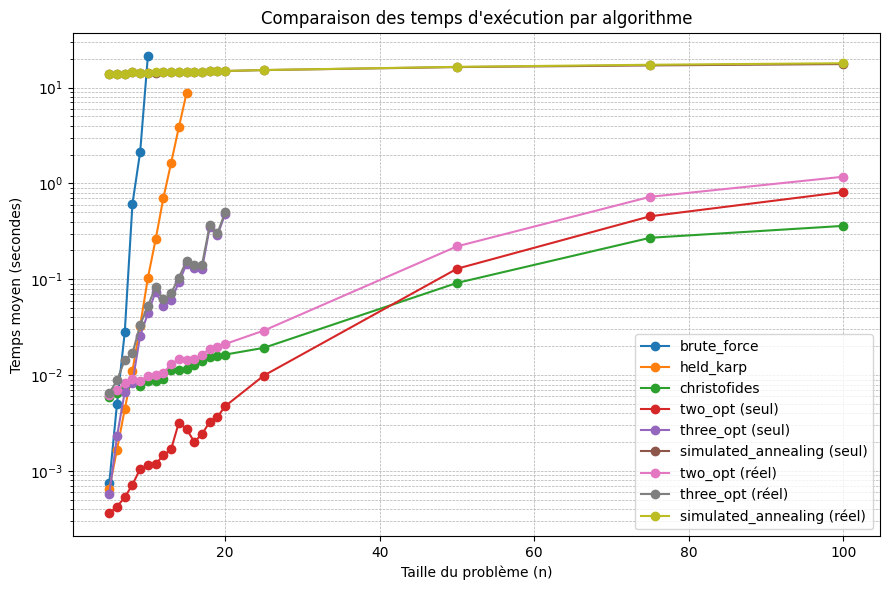

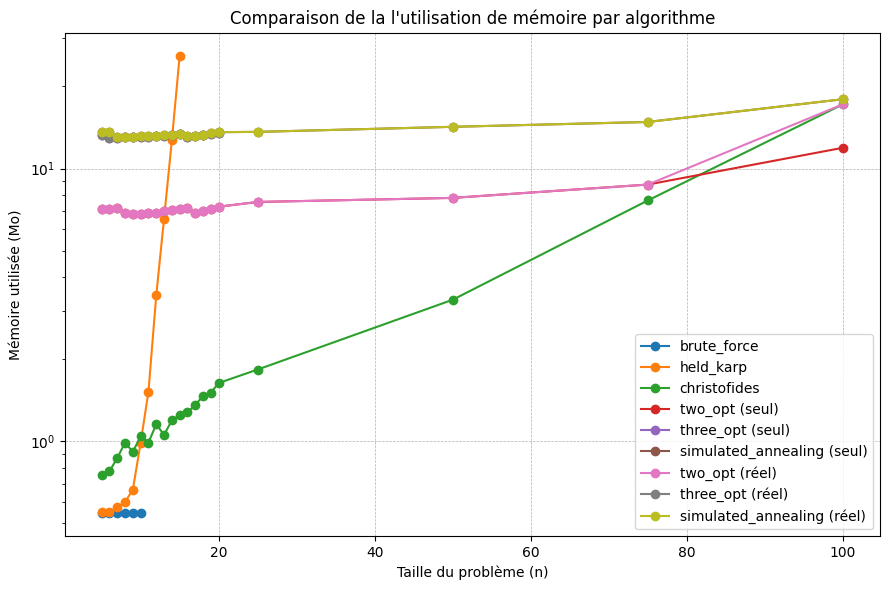

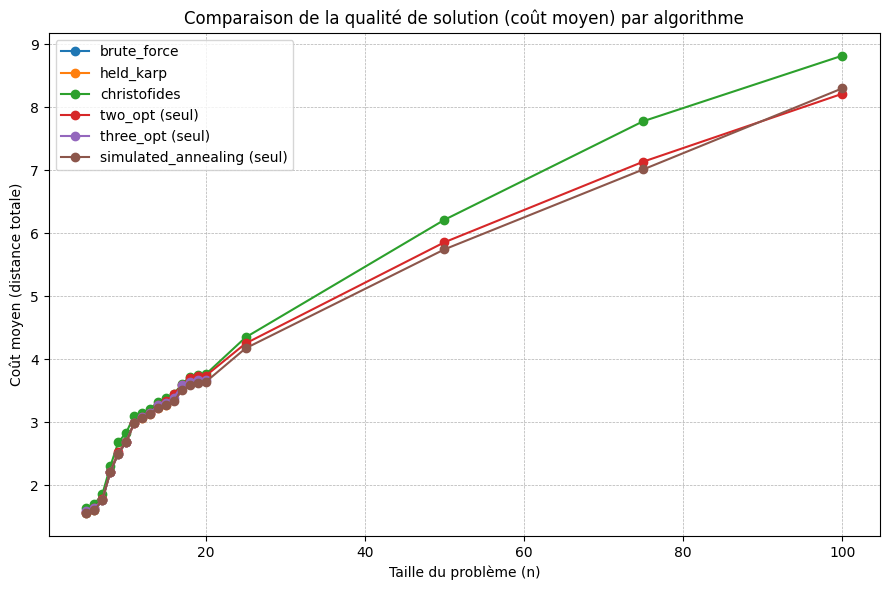

In [ ]:
# -------- GRAPHIQUE 1 : Temps d’exécution --------
plt.figure(figsize=(9,6))
for algo in ALGO_NAMES+["two_opt (réel)", "three_opt (réel)", "simulated_annealing (réel)"]:
    # On trie les tailles pour que les lignes soient dans l’ordre croissant
    sizes = sorted(time_dict[algo].keys())
    times = [time_dict[algo][s] for s in sizes]
    plt.plot(sizes, times, marker='o', label=algo)

plt.yscale('log')  # utile pour comparer des ordres de grandeur très différents
plt.xlabel("Taille du problème (n)")
plt.ylabel("Temps moyen (secondes)")
plt.title("Comparaison des temps d'exécution par algorithme")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# -------- GRAPHIQUE 2 : Utilisation de la mémoire --------
plt.figure(figsize=(9,6))
plt.yscale('log')  # utile pour mieux visualiser la difference entre les algorithmes
for algo in ALGO_NAMES+["two_opt (réel)", "three_opt (réel)", "simulated_annealing (réel)"]:
    sizes = sorted(memory_dict[algo].keys())
    mem = [memory_dict[algo][s] for s in sizes]
    plt.plot(sizes, mem, marker='o', label=algo)

plt.xlabel("Taille du problème (n)")
plt.ylabel("Mémoire utilisée (Mo)")
plt.title("Comparaison de la l'utilisation de mémoire par algorithme")
plt.grid(True, ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# -------- GRAPHIQUE 3 : Qualité de solution (coût moyen) --------
plt.figure(figsize=(9,6))
for algo in ALGO_NAMES:
    sizes = sorted(size_dict[algo].keys())
    costs = [size_dict[algo][s] for s in sizes]
    plt.plot(sizes, costs, marker='o', label=algo)

plt.xlabel("Taille du problème (n)")
plt.ylabel("Coût moyen (distance totale)")
plt.title("Comparaison de la qualité de solution (coût moyen) par algorithme")
plt.grid(True, ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

---

### 8.3 Interprétation des résultats

#### Temps d'exécutions
Les algorithmes exacts (brute_force, held_karp) ont une croissance de temps exponentielle et deviennent impraticables au-delà de $n \approx 20$. Les algorithmes approchés sont scalables. Christofides est le plus rapide pour $n > 20$. Le temps d'exécution de two_opt, three_opt et simulated_annealing est cumulatif (Christofides + raffinement) et est donc plus lent que Christofides seul.

#### Utilisation de la Mémoire
held_karp et simulated_annealing sont les plus gourmands en mémoire. Les algorithmes brute_force, christofides et les k-opt sont les plus économes, avec une croissance lente et linéaire.

#### Qualité de la Solution
Les algorithmes k-opt (two_opt et three_opt) fournissent la meilleure qualité de solution (coût le plus bas) parmi les approchés. Cette performance est due au raffinement de l'excellente solution initiale fournie par christofides. simulated_annealing suit de près. christofides, bien que le plus rapide, produit une qualité légèrement inférieure, illustrant le compromis vitesse/qualité.

### Conclusion du Choix d'Algorithme
Le meilleur compromis est la synergie **Christofides + k-Opt**. Elle offre une solution de qualité quasi-optimale (k-Opt) pour les grandes instances, tout en maintenant un temps d'exécution rapide et une faible consommation de mémoire. Pour les très petites instances ($n < 20$), held_karp trouve l'optimum.

---

## Bibliographie :

- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2023. Algorithme de Christofides. \[en ligne]. 30 janvier 2023. Disponible à l’adresse : https://fr.wikipedia.org/wiki/Algorithme_de_Christofides (consulté le 14/10/2025)
- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2025. Recherche locale (optimisation). \[en ligne]. 10 juillet 2025. Disponible à l’adresse : https://fr.wikipedia.org/wiki/Recherche_locale_(optimisation) (consulté le 16/10/2025)
- CONTRIBUTEURS AUX PROJETS WIKIMEDIA, 2025b. 2-opt. \[en ligne]. 3 septembre 2025. Disponible à l’adresse : https://fr.wikipedia.org/wiki/2-opt (consulté le 16/10/2025)
- Vincent **Barra**, *Informatique  MP2I/MPI : Algorithmique, complexité et structures de données*,  
Éditions Ellipses, 2022.
